In [13]:
import pandas as pd

In [25]:
df = pd.read_csv("c:/users/saini/Downloads/500hits.csv",encoding="latin-1")

In [26]:
df.head(3)

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1


In [27]:
df = df.drop(columns=['PLAYER','CS'])

In [28]:
df.head(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1


In [29]:
X = df.iloc[:,0:13]

In [36]:
y = df.iloc[:,13]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=17,test_size=0.2)

In [39]:
X_train.head(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
447,18,1962,6780,759,1688,245,78,24,527,338,664,192,0.249
95,19,1673,6711,1523,2296,460,205,106,0,840,238,256,0.342
378,16,2057,7236,1217,1800,346,95,344,937,924,1916,153,0.249


In [40]:
y_train.head(3)

447    0
95     1
378    0
Name: HOF, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
X_train1 = scaler.fit_transform(X_train)

In [45]:
X_train1

array([[0.46666667, 0.31917046, 0.24366789, ..., 0.25567963, 0.13223731,
        0.025     ],
       [0.53333333, 0.17298938, 0.23432209, ..., 0.0916442 , 0.17798427,
        0.8       ],
       [0.33333333, 0.36722307, 0.3054314 , ..., 0.73777436, 0.10436026,
        0.025     ],
       ...,
       [0.13333333, 0.07688417, 0.08343492, ..., 0.        , 0.2308792 ,
        0.55833333],
       [0.46666667, 0.33788569, 0.30367059, ..., 0.290335  , 0.09220872,
        0.4       ],
       [0.53333333, 0.39908953, 0.34863876, ..., 0.15941471, 0.01644031,
        0.325     ]], shape=(372, 13))

In [47]:
X_test1 = scaler.fit_transform(X_test)

In [49]:
X_test1

array([[0.23076923, 0.30055317, 0.31302669, ..., 0.54689984, 0.31629834,
        0.19090909],
       [0.53846154, 0.36201598, 0.2224368 , ..., 0.64493906, 0.29834254,
        0.59090909],
       [0.61538462, 0.54886294, 0.44908708, ..., 0.5590885 , 0.37430939,
        0.10909091],
       ...,
       [0.46153846, 0.3909035 , 0.28844803, ..., 0.91732909, 0.        ,
        0.29090909],
       [0.30769231, 0.13644745, 0.05442416, ..., 0.57657658, 0.15469613,
        0.41818182],
       [0.07692308, 0.14320836, 0.12745787, ..., 0.37943826, 0.54281768,
        0.37272727]], shape=(93, 13))

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=8)

In [63]:
knn.fit(X_train1,y_train)

KNeighborsClassifier(n_neighbors=8)

In [64]:
y_pred = knn.predict(X_test1)

In [65]:
knn.score(X_test1,y_test)

0.8064516129032258

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
cm = confusion_matrix(y_pred,y_test)

In [68]:
cm

array([[52,  9],
       [ 9, 23]])

In [69]:
cr = classification_report(y_pred,y_test)

In [70]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        61
           1       0.72      0.72      0.72        32

    accuracy                           0.81        93
   macro avg       0.79      0.79      0.79        93
weighted avg       0.81      0.81      0.81        93



In [71]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtc = DecisionTreeClassifier()

In [92]:
dtc.fit(X_train1,y_train)

DecisionTreeClassifier()

In [93]:
dtc.score(X_test1,y_test)

0.6881720430107527

In [94]:
y_pred = dtc.predict(X_test1)

In [95]:
cm = confusion_matrix(y_pred,y_test)

In [96]:
cm

array([[35,  3],
       [26, 29]])

In [97]:
cr = classification_report(y_pred,y_test)

In [98]:
print(cr)

              precision    recall  f1-score   support

           0       0.57      0.92      0.71        38
           1       0.91      0.53      0.67        55

    accuracy                           0.69        93
   macro avg       0.74      0.72      0.69        93
weighted avg       0.77      0.69      0.68        93



In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc = RandomForestClassifier()

In [108]:
rfc.fit(X_train1,y_train)

RandomForestClassifier()

In [109]:
rfc.score(X_test1,y_test)

0.7526881720430108

In [110]:
y_pred = rfc.predict(X_test1)

In [111]:
cm = confusion_matrix(y_pred,y_test)

In [112]:
cm

array([[43,  5],
       [18, 27]])

In [113]:
cr = classification_report(y_pred,y_test)

In [114]:
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        48
           1       0.84      0.60      0.70        45

    accuracy                           0.75        93
   macro avg       0.77      0.75      0.75        93
weighted avg       0.77      0.75      0.75        93



In [115]:
features = pd.DataFrame(rfc.feature_importances_ , index=X.columns)

In [116]:
features

,0
YRS,0.028940
G,0.061101
AB,0.090157
R,0.130829
H,0.139983
2B,0.076788
3B,0.045616
HR,0.054862
RBI,0.095187
BB,0.038600


In [120]:
sum(features[0])

1.0

In [121]:
def con(value):
    return value*100

In [122]:
features[0] = features[0].map(con)

In [123]:
features[0]

YRS     2.893968
G       6.110104
AB      9.015725
R      13.082913
H      13.998315
2B      7.678822
3B      4.561590
HR      5.486174
RBI     9.518731
BB      3.859990
SO      4.814175
SB      4.712405
BA     14.267088
Name: 0, dtype: float64

In [124]:
sum(features[0])

100.0

In [1]:
# Support Vector Machine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
mean1 = 55
std_div1 = 10
num_samples = 500

column1 = np.random.normal(mean1,std_div1,num_samples)
column1 = np.clip(column1,30,120)
column1 = np.round(column1).astype(int)

mean2 = 18
std_div2 = 3

column2 = np.random.normal(mean2,std_div2,num_samples)
column2 = np.clip(column2,12,26)
column2 = np.round(column2).astype(int)

column3 = np.random.randint(2,size=num_samples)
column3[column1>mean1] = 1

data = {
    "Miles Per Weeks":column1,
    "Farthest Run":column2,
    "Qualified_Boston_Marathon":column3
}
df = pd.DataFrame(data)

In [14]:
df.head(3)

,Miles Per Weeks,Farthest Run,Qualified_Boston_Marathon
0,53,17,1
1,58,21,1
2,51,21,1


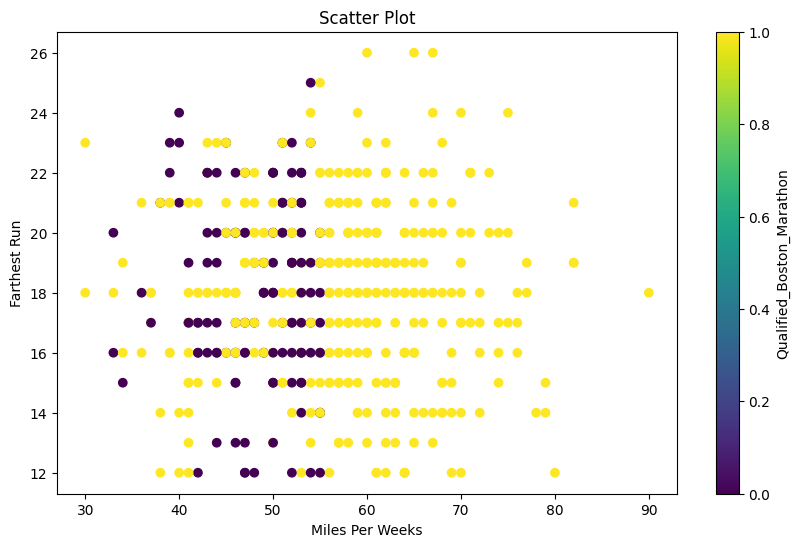

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df["Miles Per Weeks"],df["Farthest Run"],c=df["Qualified_Boston_Marathon"],cmap="viridis")
plt.xlabel("Miles Per Weeks")
plt.ylabel("Farthest Run")
plt.title("Scatter Plot")
plt.colorbar(label="Qualified_Boston_Marathon")
plt.show()

In [19]:
X = df.iloc[:,0:2]

In [21]:
X.head(3)

,Miles Per Weeks,Farthest Run
0,53,17
1,58,21
2,51,21


In [23]:
y = df.iloc[:,2]

In [24]:
y.head(3)

0    1
1    1
2    1
Name: Qualified_Boston_Marathon, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33,test_size=0.2)

In [27]:
X_train.shape

(400, 2)

In [28]:
y_train.shape

(400,)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()

In [31]:
model.fit(X_train,y_train)

SVC()

In [32]:
model.score(X_test,y_test)

0.8

In [38]:
model = SVC(C=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8

In [39]:
model = SVC(C=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8

In [40]:
model = SVC(C=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.77

In [41]:
model = SVC(gamma=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.78

In [42]:
model = SVC(gamma=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.83

In [43]:
model = SVC(gamma=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.78

In [44]:
model = SVC(kernel="linear")
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8

In [45]:
model = SVC(kernel="rbf")
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8